# <a href="https://www.linkedin.com/in/imanojchandra/">Manoj Chandra</a>

# Data Science & Business Analytics Intern at <a href="https://www.thesparksfoundationsingapore.org/">The Sparks Foundation.</a>

## Task 2: Prediction using Unsupervised Machine Learning
From given "Iris" dataset, predict the optimum number of clusters and represent it visually.

**The Iris Dataset** 
<br>This data sets consists of 3 different types of irises (Setosa, Versicolour, and Virginica) petal and sepal length and width.

<div style="text-align: center;">
    <img src="Assets/Iris_setosa.PNG" alt="Image" style="width: 250px; height: 310px;"/> 
    <p><b>Iris setosa</b> is similar in form to a miniature Japanese iris, or a dwarf version of Iris sibirica but a shorter lived version. The shallowly rooted, large, branching rhizomes spread over time to create large clumps. The rhizomes are grey-brown, thick, and are covered with old (maroon-brown) fibrous leaf remains (of last seasons leaves). It has branched stems, which are very variable in height, ranging from 10 cm (5 inches) up to 1 m (3 ft) tall. The larger plants can grow beyond the height of the leaves. The roundish stems are between 1.5–9 cm in diameter with 1 to 3 branches. Iris setosa has mid-green leaves, which are grass-like, and lanceolate (sword-shaped). They have a purplish tinged base and the leaves can measure 30–60 cm (12–24 in) long by 0.8–2.5 cm wide. The plant has 3–4 flowers per stem (between 6 and 13 for the whole plant, in groups of 3,) and it blooms between June and July. The large flowers are between 5–8 cm (3–6 in) across, usually 7–8 cm, and come in a range of shades of blue, which can depend on the location. and range from violet, purple-blue, violet-blue, blue, to lavender. Very occasionally, there are pink or white forms.</p>
</div>
<br>
<div style="text-align: center;">
    <img src="Assets/Iris_versicolor.PNG" alt="Image" style="width: 320px; height: 250px;"/> 
    <p><b>Iris versicolor</b> is a flowering herbaceous perennial plant, growing 10-80 cm (4-31 in) high. It tends to form large clumps from thick, creeping rhizomes. The unwinged, erect stems generally have basal leaves that are more than 1 cm (1⁄2 in) wide. Leaves are folded on the midribs so that they form an overlapping flat fan. The well developed blue flower has 6 petals and sepals spread out nearly flat and have two forms. The longer sepals are hairless and have a greenish-yellow blotch at their base. The inferior ovary is bluntly angled. Flowers are usually light to deep blue (purple and violet are not uncommon) and bloom during May to July. Fruit is a 3-celled, bluntly angled capsule. The large seeds can be observed floating in fall.</p>
</div>

<br>
<div style="text-align: center;">
    <img src="Assets/Iris_virginica.PNG" alt="Image" style="width: 340px; height: 250px;"/> 
    <p><b>Iris virginica</b> is a perennial plant. The plant has 2 to 4 erect or arching, bright green, lance-shaped leaves that are flattened into one plane at the base. Leaves are 1–3 cm (1⁄2–1 1⁄4 in) wide and are sometimes longer than the flower stalk. The fleshy roots (1–2 cm or 1⁄2–3⁄4 in in diameter) are rhizomes that spread underground. Pale brown, variably shaped seeds are born in three-part fruit capsules (3–6 cm or 1 1⁄4–2 1⁄4 in long, 1–2 cm or 1⁄2–3⁄4 in wide). The slightly fragrant flowers (4 cm or 1 1⁄2 in long, 7 cm or 2 3⁄4 in across) consist of 3 horizontal sepals, or "falls", and 3 erect petals. The petals and sepals can vary in color from dark-violet to pinkish-white. The sepals have a splash of yellow to yellow-orange at the crest. Each plant has 2 to 6 flowers that bloom from April to May upon a single, erect, 30–90 cm (12–35 in) tall stalk. The stalk is sometimes branched and has a slight zigzag appearance.</p>
</div>

### Importing required libraries

In [95]:
# Importing the standard required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Loading the Iris data

In [93]:
#loading the given dataset
iris_data = pd.read_csv('Iris.csv')

### Viewing and cleaning the data

In [26]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [342]:
iris_data.head(7) # See the first 7 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [343]:
iris_data.tail(5) # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [344]:
iris_data.shape

(150, 6)

In [27]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [346]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [348]:
#Checking data for missing values using
iris_data.isnull().sum() #total no. of missing value

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in our data so we are good to go for K-mean clustering

In [29]:
#Dropping the irrelevant columns
iris_data.drop('Id', axis=1, inplace=True)

In [30]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

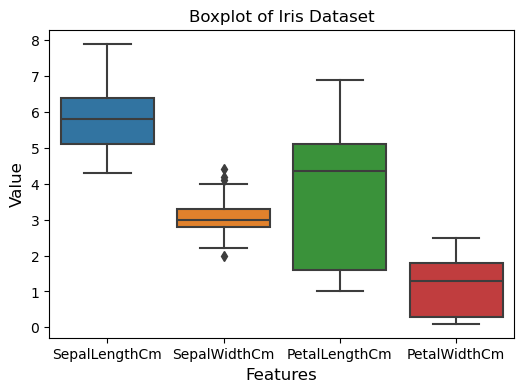

In [352]:
#Boxplot of Iris Dataset
plt.figure(figsize=(6, 4))
sns.boxplot(data=iris_data)
plt.title('Boxplot of Iris Dataset', fontsize=12) 
plt.xlabel('Features')  
plt.ylabel('Value') 
plt.show()

 It makes more sense to see the distribution of the values considering each class, since we have labels for each class.

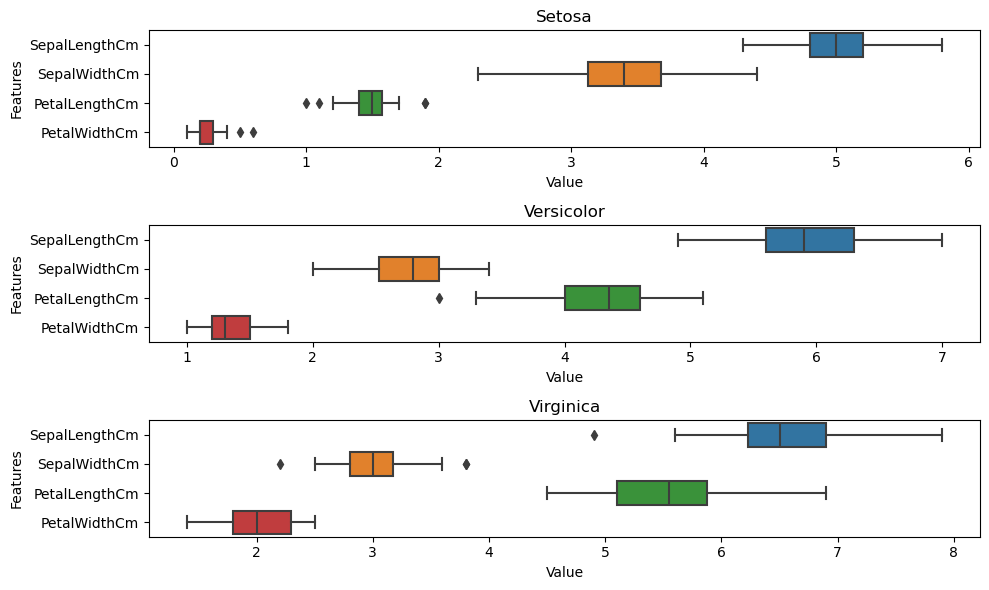

In [110]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

# Boxplot for Setosa
sns.boxplot(data=setosa.iloc[:, :4], orient='h', ax=axes[0])
axes[0].set_title('Setosa')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Features')

# Boxplot for Versicolor
sns.boxplot(data=versicolor.iloc[:, :4], orient='h', ax=axes[1])
axes[1].set_title('Versicolor')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Features')

# Boxplot for Virginica
sns.boxplot(data=virginica.iloc[:, :4], orient='h', ax=axes[2])
axes[2].set_title('Virginica')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Features')

plt.tight_layout() 
plt.show()

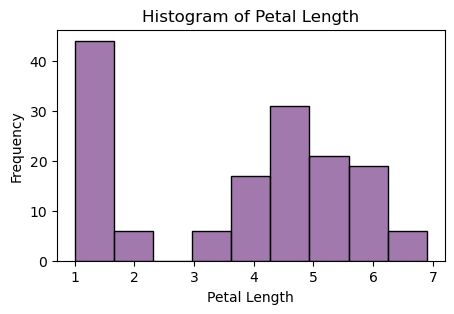

In [109]:
# histogram for Petal Length
plt.figure(figsize=(5, 3))
sns.histplot(iris_data['PetalLengthCm'], color = "#824C90", kde=False)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

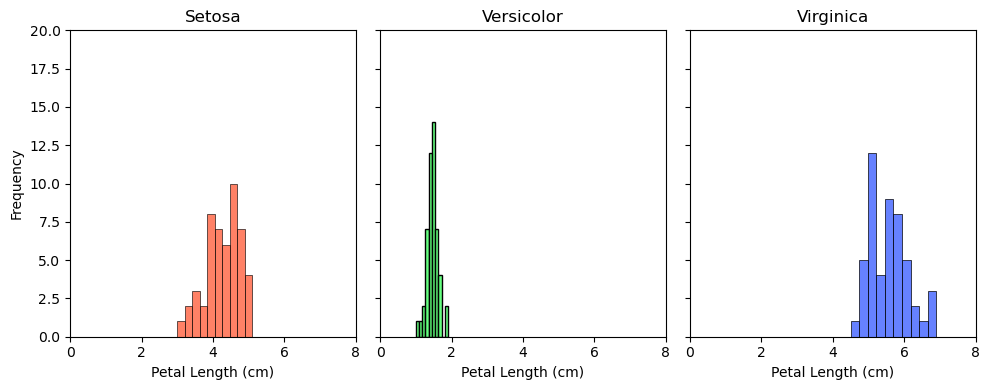

In [106]:
# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

# Plot histograms for each species
sns.histplot(data=iris_data[iris_data['Species'] == 'Iris-setosa'], x='PetalLengthCm', bins=10, kde=False, color='#33FF57', ax=axs[1])
axs[0].set_title('Setosa')
axs[0].set_xlim(0, 8)
axs[0].set_ylim(0, 20)
axs[0].set_xlabel('Petal Length (cm)')
axs[0].set_ylabel('Frequency')

sns.histplot(data=iris_data[iris_data['Species'] == 'Iris-versicolor'], x='PetalLengthCm', bins=10, kde=False, color='#FF5733', ax=axs[0])
axs[1].set_title('Versicolor')
axs[1].set_xlim(0, 8)
axs[1].set_ylim(0, 20)
axs[1].set_xlabel('Petal Length (cm)')

sns.histplot(data=iris_data[iris_data['Species'] == 'Iris-virginica'], x='PetalLengthCm', bins=10, kde=False, color='#3357FF', ax=axs[2])
axs[2].set_title('Virginica')
axs[2].set_xlim(0, 8)
axs[2].set_ylim(0, 20)
axs[2].set_xlabel('Petal Length (cm)')

# Show the plot
plt.tight_layout()
plt.show()


These show that the distribution of values for Petal Length are different for each class.

Bean plots below shows the data and its distribution:

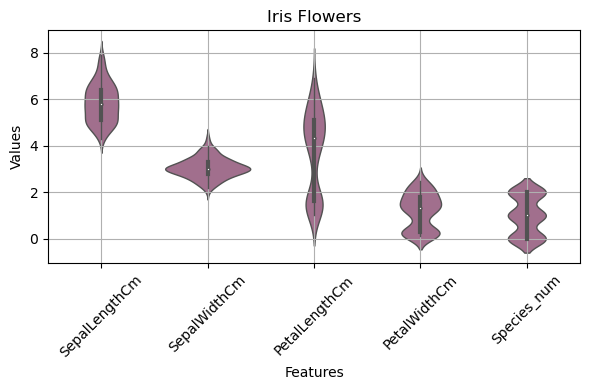

In [88]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=iris_data, palette=['#A9678F'], linewidth=1)
plt.title('Iris Flowers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

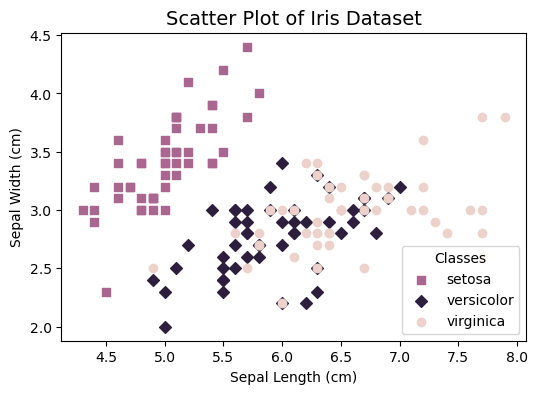

In [87]:
#Scatter Plot of the Iris dataset
plt.figure(figsize=(6, 4))

colors = {'Iris-setosa': '#A9678F', 'Iris-versicolor': '#2D1E3E', 'Iris-virginica': '#EDD1CB'}
# Scatter plot for Setosa
setosa = iris_data[iris_data['Species'] == 'Iris-setosa']
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label='setosa', color=colors['Iris-setosa'],marker="s")

# Scatter plot for Versicolor
versicolor = iris_data[iris_data['Species'] == 'Iris-versicolor']
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label='versicolor', color=colors['Iris-versicolor'],marker="D")

# Scatter plot for Virginica
virginica = iris_data[iris_data['Species'] == 'Iris-virginica']
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label='virginica', color=colors['Iris-virginica'],marker="o")

plt.title('Scatter Plot of Iris Dataset', fontsize=14)  # Added title with fontsize
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.legend(title="Classes", fontsize=10)
plt.show()

Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types.

# K-means Clustering

I will be using K-means Clustering algorithm to predict the optimum number of clusters 
<br>**K-Means**  is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

### Model Training

### Splitting the Data into Training and Testing data

In [32]:
#this is our target set
iris_target = iris_data.iloc[:,4]
iris_target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [33]:
#this is our training data
train_iris = iris_data.iloc[:,[0,1,2,3]]
train_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Deciding the optimal number of clusters

#### WSS/The Elbow Method

The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation (or total Within-Cluster Sum of Square (WSS)) is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss)using the following formula:
<div>
    <img src="Assets/wss_formula.PNG" alt="Image" style="width: 570px; height: 120px;"/> 
</div>
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In simple words, imagine you have a bunch of dots on a map.
<br>WSS tells you how spread out the dots are within each group. Lower WSS means the dots are closer together (tighter groups).
<br>The Elbow Method helps you find the best number of groups. You try different numbers, and at some point, adding more groups doesn't make the dots much tighter (less WSS reduction). That's the "sweet spot" for the number of groups

#### Finding the optimal number of clusters for k-means classification

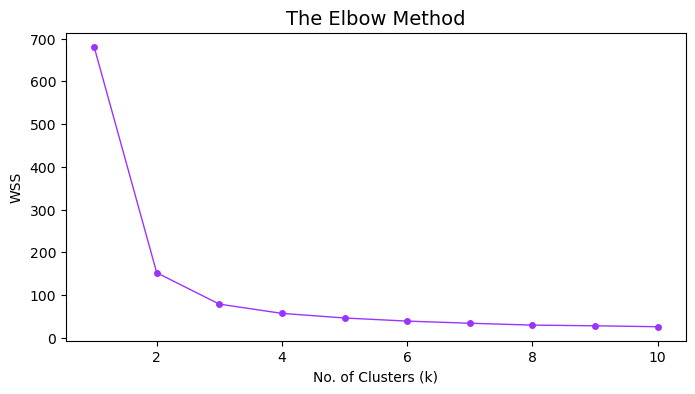

In [86]:
wss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(train_iris)
    wss.append(km.inertia_)
np.array(wss)
fig, ax = plt.subplots(figsize=(8,4))
ax = plt.plot(range(1,11), wss, linewidth=1, color="#9C33FF", marker ="o", markersize=4)
plt.ylabel('WSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 14)
plt.show()

In the preceding graph, we can choose the elbow of the graph at k=3, as the value of WSS starts dropping more slowly after k=3. 

Now that we have the optimal number of clusters, we can proceed with creating and training the **KMeans clustering model** with k=3 using the training data. 
#### K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++', 
             max_iter = 300, n_init = 10, random_state = 0)
# kms.fit(train_iris)
y_kms = kms.fit_predict(train_iris)

In [35]:
# Use kmeans to train the model and predict cluster labels simultaneously
clusters = train_iris.copy()
clusters['Cluster'] = kms.fit_predict(train_iris)
clusters.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1


In [36]:
clusters.tail(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


**Compare Clusters with Actual Species**

In [37]:
# Adding the actual species to the clusters dataframe for comparison
clusters['Species'] = iris_target.values
clusters.head()

# Display the crosstab of the actual species vs the clusters assigned
ct = pd.crosstab(clusters['Species'], clusters['Cluster'])
print(ct)


Cluster           0   1   2
Species                    
Iris-setosa       0  50   0
Iris-versicolor  48   0   2
Iris-virginica   14   0  36


**Evaluating Clustering Performance**

In [38]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(iris_target, clusters['Cluster'])
print(f'Adjusted Rand Index: {ari}')


Adjusted Rand Index: 0.7302382722834697


In [39]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(train_iris, clusters['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5525919445499757


In [40]:
cluster_centers = pd.DataFrame(kms.cluster_centers_, columns=train_iris.columns)
cluster_centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


## Visualising the clusters

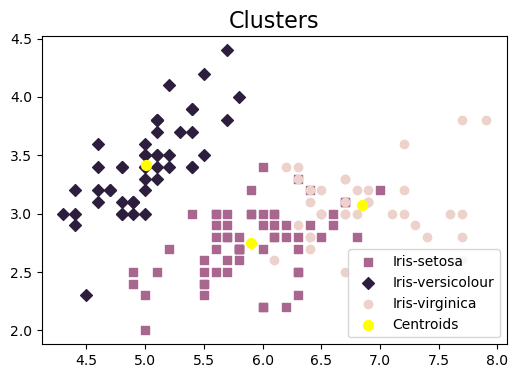

In [51]:
# Scatter plot of the clusters

plt.figure(figsize=(6, 4))
colors = {'Iris-setosa': '#A9678F', 'Iris-versicolor': '#2D1E3E', 'Iris-virginica': '#EDD1CB'}
plt.scatter(train_iris.loc[y_kms == 0, train_iris.columns[0]], train_iris.loc[y_kms == 0, train_iris.columns[1]], 
            c='#A9678F', label='Iris-setosa', marker="s")
plt.scatter(train_iris.loc[y_kms == 1, train_iris.columns[0]], train_iris.loc[y_kms == 1, train_iris.columns[1]], 
            c='#2D1E3E', label='Iris-versicolour', marker="D")
plt.scatter(train_iris.loc[y_kms == 2, train_iris.columns[0]], train_iris.loc[y_kms == 2, train_iris.columns[1]], 
            c='#EDD1CB', label='Iris-virginica', marker="o")

# Plotting the centroids of the clusters
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            s=50, c='yellow', label='Centroids')

plt.legend()
plt.title('Clusters', fontsize = 16)
plt.show()


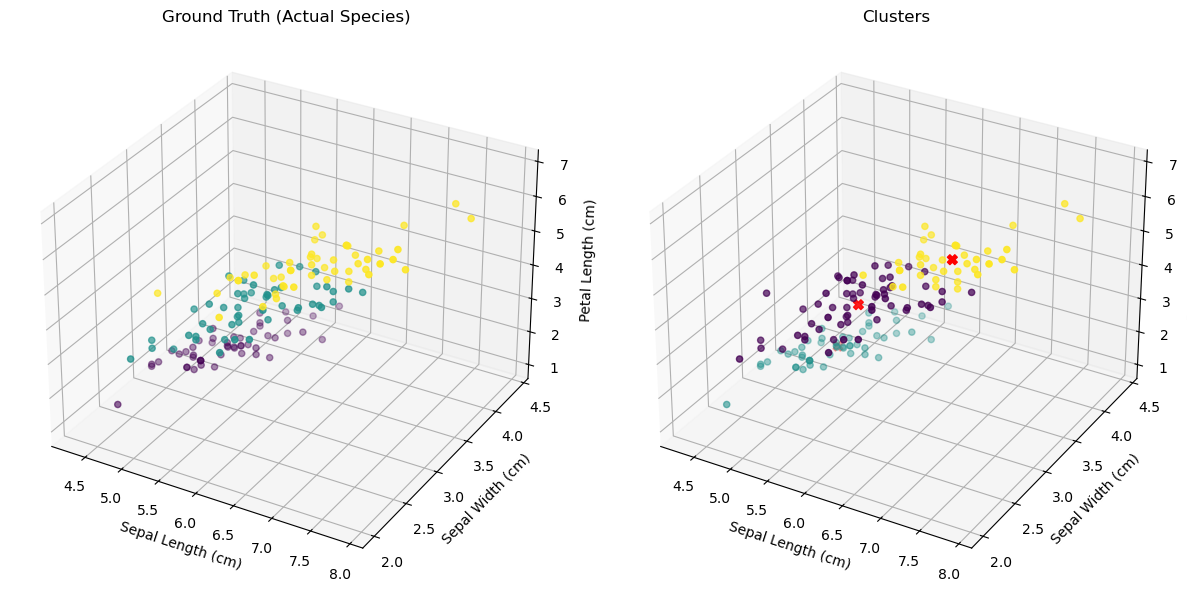

In [85]:
# side-by-side comparison of the 3D scatter plot for the clusters and the ground truth:

# Mapping species to numerical values for plotting
species_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Species_num'] = iris_data['Species'].map(species_to_num)

# Plotting the 3D scatter plot for ground truth and clusters side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 10), subplot_kw={'projection': '3d'},gridspec_kw={'wspace': 0.1})

# Plotting ground truth
axs[0].scatter(iris_data['SepalLengthCm'], iris_data['SepalWidthCm'], iris_data['PetalLengthCm'], c=iris_data['Species_num'], cmap='viridis')
axs[0].set_title('Ground Truth (Actual Species)')
axs[0].set_xlabel('Sepal Length (cm)')
axs[0].set_ylabel('Sepal Width (cm)')
axs[0].set_zlabel('Petal Length (cm)')

# Plotting clusters
axs[1].scatter(clusters['SepalLengthCm'], clusters['SepalWidthCm'], clusters['PetalLengthCm'], c=clusters['Cluster'], cmap='viridis')
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
                s=50, c='red', marker='X', label='Centroids')
axs[1].set_title('Clusters')
axs[1].set_xlabel('Sepal Length (cm)')
axs[1].set_ylabel('Sepal Width (cm)')
axs[1].set_zlabel('Petal Length (cm)')

plt.tight_layout()
plt.show()

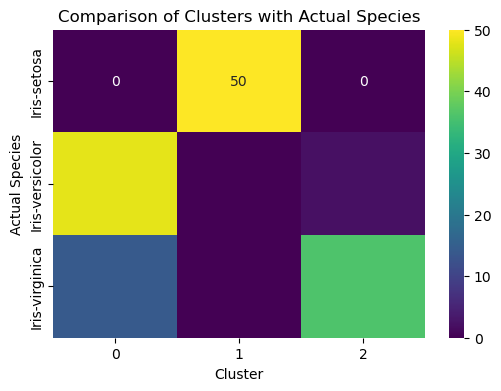

In [52]:
# Plotting the crosstab as a heatmap
plt.figure(figsize=(6, ))
sns.heatmap(ct, annot=True, cmap='viridis', fmt='d')
plt.title('Comparison of Clusters with Actual Species')
plt.xlabel('Cluster')
plt.ylabel('Actual Species')
plt.show()

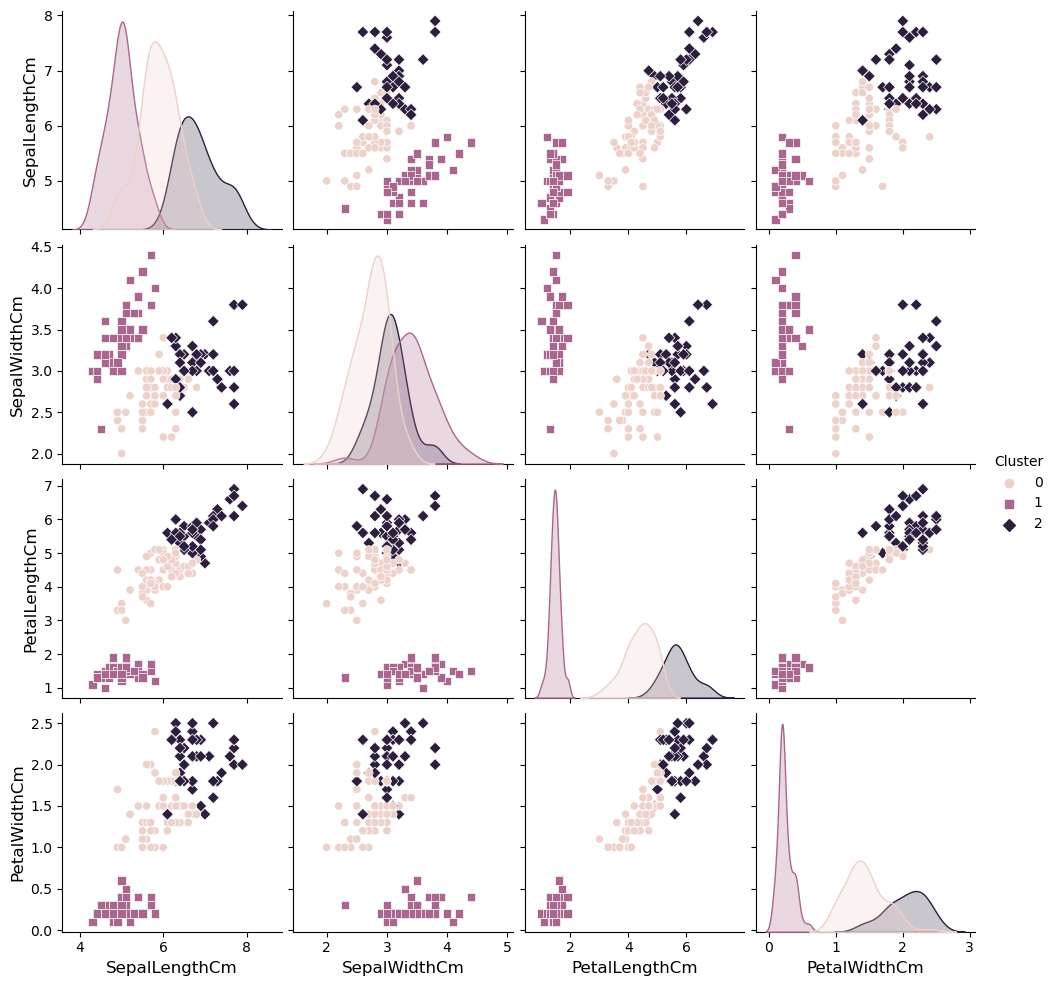

In [540]:
# Pair plot to visualize the clusters
sns.pairplot(clusters, hue='Cluster', markers=["o", "s", "D"])
plt.show()

Here, We can see that PairPlot reveals a positive correlation between petal length and petal width. 
Iris setosa stands out as the clear outlier, with its data points clustered in a separate area, indicating Iris setosa flowers are generally smaller in both petal length and width compared to the other Iris species. In general, we can say that Iris setosa may be the smallest of the three Iris species in terms of petal size.

# Task Completed